In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Reflexionsexperiment
## Vorbereitung
## 1. Wellenimpedanz unisolierte Doppelstegleitung (Lecherleitung)

Gegeben: $a = 19mm, d = 6.9mm $<br>
Gesucht: $Z_0$ <br>
Lösung: $Z_0 = \frac{(120\Omega)}{\sqrt{\epsilon_r}} \ln(\frac{2a}{d}) \approx 200\Omega$

## Graphische Darstellung:

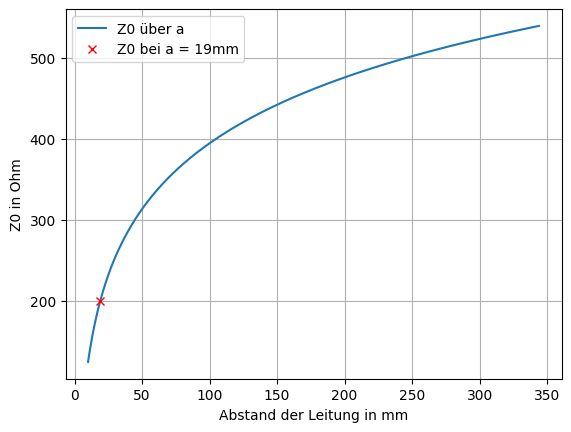

Z0 =  199.7938454577989
Z0 Wiki =  195.72639831956553


In [7]:
er = 1.05
d = 6.9
a = np.arange(10, 50*d, 1)
a19 = 19
Z0 = 120/np.sqrt(er) * np.log(2*a/d)
Z0Wiki = 120/np.sqrt(er) * np.arccosh(a19/d)
Z019 = 120/np.sqrt(er) * np.log(2*a19/d)
plt.figure()
plt.plot(a, Z0, label="Z0 über a")
plt.plot(a19,Z019, "rx", label="Z0 bei a = 19mm")
plt.xlabel("Abstand der Leitung in mm")
plt.ylabel("Z0 in Ohm")
plt.grid()
plt.legend()
plt.show()
print("Z0 = ",Z019)
print("Z0 Wiki = ", Z0Wiki)

## 2. Kapazität(belag) & Induktivität(belag) berechnen

Gesucht: $C',  C,  L',  L$ <br>
Gegeben: $a = 19mm, d = 6.9mm, l = 0.83cm$ <br>
Lösung:<br>
$C' = \pi \cdot \epsilon_0 \cdot \epsilon_r \frac{1}{\operatorname{arcosh}(\frac{a}{d})} = 17.4 pF $ <br>
$C = C' * l = 14.5 pF $


In [8]:
a = 19
d = 6.9
l = 0.83
er = 1.05
e0 = 8.8541878128e-12
Cbelag = np.pi*er*e0*1/np.arccosh(a/d)
Cbelag2 = np.pi*er*e0*1/np.log(2*a/d)

C = Cbelag * l
print("C' =", Cbelag, "F")
print("C2' =", Cbelag2, "F")
print("C =", C, "F")

C' = 1.747531825416035e-11 F
C2' = 1.711955187377094e-11 F
C = 1.4504514150953091e-11 F


$L' = \frac{\mu_r \mu_0}{\pi} \operatorname{arcosh}(\frac{a}{d}) = 0.67 \micro H  $<br>
$L = L' * l = 0.55 \micro H$ <br>

In [9]:
mu0 = 1.2566370614359e-6

mur = 1.0 + 4e-7
Lbelag = (mu0*mur)/(np.pi) * np.arccosh(a/d)
#Lbelag = (mu0*mur)/(np.pi) * np.log(2*a/d)

L = Lbelag * l
print("L' =", Lbelag, "H")
print("L =", L, "H")

L' = 6.685331898062217e-07 H
L = 5.54882547539164e-07 H


## Impedanz der Leitung

Lösung: $Z_0 = \sqrt{\frac{L'}{C'}}$

In [10]:
Z0 = np.sqrt(L/C)
print(Z0)

195.5910326638006


# 3. Ausbreitungsgeschwindigkeit, Verkürzungsfaktor
## Ausbreitungsgeschwindigkeit
Gegeben: $\frac{\lambda}{2} = 35 cm$ <br>
$f = 400 Mhz$ <br>
Gesucht: $v_p$ <br>
Lösung: $v_p = \frac{1}{\sqrt{\epsilon_0 \mu_0} \sqrt{\epsilon_r \mu_r}}$


In [11]:
vp = 1/(np.sqrt(e0 * mu0)*np.sqrt(er*mur))
print(vp)

292567423.19778293


## Verkürzungsfaktor

Gesucht: $VK$ <br>
Lösung: $VK = \frac{v_p}{c_o}$

In [12]:
c0 = 299792458
vk = vp/c0
print(vk)

0.9758998780342331


### Der Verkürzungsfaktor gibt an mit welcher Höhe sich die Ausbreitungsgeschwindigkeit der Welle gegenüber der Lichtgeschwindigkeit ändert

# 4. Berechnungen

## a) Kurzschluss: $Z_v = 0 \ohm$

$Z_{A_{KS}} = Z_0 \cdot(\frac{1-e^{-2\gamma l}}{1+e^{-2\gamma l}}) = 8.34 \ohm$ <br>
$\gamma = \alpha + j \beta $ mit $\alpha = 0$ (verlustlose Leitung)


In [15]:
f = 433.92e6
beta = 2*np.pi*f*np.sqrt(Lbelag*Cbelag)

Zaks = 200*((1-np.exp(-2*1j*beta*l))/(1+np.exp(-2*1j*beta*l)))

Zall = 200*((1+np.exp(-2*1j*beta*l))/(1-np.exp(-2*1j*beta*l)))
Z0_calc = np.sqrt(Zaks*Zall)

print("Kurzschlussimpedanz: ",Zaks/200)




Kurzschlussimpedanz:  (-8.103255252164176e-16+8.341443962087908j)


## b) Leerlauf: $Z_v \rightarrow \infty$
$Z_{A_{LL}} = Z_0 * (\frac{1+e^{-2\gamma l}}{1-e^{-2\gamma l}}) = 23.98 \ohm$

In [16]:
Zall = 200*((1+np.exp(-2*1j*beta*l))/(1-np.exp(-2*1j*beta*l)))
print("Leerlaufimpedanz: ", np.abs(Zall)/200)
print("\n")

print("Probe: Z0 = wurzel(Kurzschlussimpedanz * Leerlaufimpedanz) = ", np.abs(np.sqrt(Zall*Zaks)))

Leerlaufimpedanz:  0.11988332050722002


Probe: Z0 = wurzel(Kurzschlussimpedanz * Leerlaufimpedanz) =  200.0


## c) Anpassung: $Z_v = 200\ohm$

$Z_N = \frac{Z_v}{Z_0} = \frac{200\ohm}{200\ohm} = 1$

## d) $R_1=100\ohm$ <br>
$Z_N = \frac{R_1}{Z_0} = \frac{100\ohm}{200\ohm} = 0.5$

## e) $R_2=400\ohm$ <br>
$Z_N = \frac{R_2}{Z_0} = \frac{400\ohm}{200\ohm} = 2$

## f) $C_1=2,2 pF$ <br>
$Z_N = \frac{C_1}{Z_0} = \frac{-j\cdot \frac{1}{2 \cdot\pi \cdot 433.92 MHz\cdot 2.2 pF}}{200\ohm} = -0.83j$

## g) $C_2=10 pF$ <br>
$Z_N = \frac{C_2}{Z_0} = \frac{-j\cdot \frac{1}{2 \cdot \pi \cdot 433.92 MHz \cdot 10 pF}}{200\ohm} = -0.18j$

## h) $L_1=47  nH$ <br>
$Z_N = \frac{L_1}{Z_0} = \frac{j\cdot 2 \cdot \pi \cdot 433.92 MHz \cdot 47 nH}{200\ohm} = 0.65j$

## i) $L_2=100  nH$ <br>
$Z_N = \frac{L_1}{Z_0} = \frac{j\cdot 2 \cdot \pi \cdot 433.92 MHz \cdot 100 nH}{200\ohm} = 1.36j$

<img src="smith1.png" alt="Alternative text" /> <br>
<img src="smith2.png" alt="Alternative text" /> <br>

<img src="smith3.png" alt="Alternative text" /> <br>

